In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
import pandas as pd

src_data = '/content/drive/MyDrive/STKI/dataset_sms_spam_v1.csv'
df = pd.read_csv(src_data)

In [37]:
df

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2
...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0
1140,Mba mau kirim 300 ya,0
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0


In [38]:
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_factory = stopwords.words('indonesian')

# https://en.wikipedia.org/wiki/Unicode_block
EMOJI_PATTERN = re.compile(
    "["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "]+"
)

#remove emoji
def remove_emoji(text):
    return re.sub(EMOJI_PATTERN, r"", text)

#stopword removal
def remove_stop_words(text):
    # sw = stop_factory + more_stopword
    sw = stop_factory
    clean_words = []
    text = text.split()
    for word in text:
        if word not in sw:
            clean_words.append(word)
    return " ".join(clean_words)

def clean_text(reviews):
    all_reviews = list()
    lines = reviews.values.tolist()
    for text in lines:
        text = re.sub(r"http\S+", " ", text) #hapus URL atau incomplete URL
        text = re.sub("#\S+", " ", text) #hapus #
        text = re.sub(r"\d+", " ", text) #hapus angka 1 digit atau lebih
        text = re.sub(r"\n", " ", text) #hapus newline
        text = text.translate(str.maketrans(" "," ",string.punctuation)) #hapus tanda baca 
        text = text.strip() #hapus spasi di depan dan di belakang
        text = text.lower() #mengubah ke dalam huruf kecil
        text = re.sub("\s+"," ", text) #hapus beberapa spasi menjadi satu spasi
        text = re.sub(r"\b[a-zA-Z]\b", " ", text) #hapus single character
        text = remove_stop_words(text)
        text = remove_emoji(text)
        all_reviews.append(text) 
    return all_reviews

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
df['Teks bersih'] = clean_text(df['Teks'])
del df['label']

In [70]:
del df['Cluster']
df[:10]

,Teks,Teks bersih
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,promo beli paket flash gb my telkomsel app dpt...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,gb rp ribu spesial terpilih aktifkan promo sd ...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",plg yth sisa kuota flash kb download mytelkoms...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",plg yth sisa kuota flash kb download mytelkoms...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,gb rp ribu spesial terpilih aktifkan buruan skb
5,5 HARI LAGI ! EKSTRA Pulsa 50rb dg beli paket ...,ekstra pulsa rb dg beli paket internet bulanan...
6,"Ada iRing dgn tarif Rp. 0,1/7hr (perpanjangan ...",iring dgn tarif rp hr perpanjangan rp hr hits ...
7,Akhir bulan harus tetap eksis loh! Internetan ...,eksis loh internetan pake volume ultima mb hr ...
8,Aktifkan iRing Coboy Jr - Terhebat. Tekan *808...,aktifkan iring coboy jr terhebat tekan info hi...
9,Ambil bonus harianmu di *600# (Bebas Pulsa). D...,ambil bonus harianmu bebas pulsa dptkan gratis...


In [40]:
xmpl = ["saya berangkat ke kampus untuk belajar",
        "ibu pergi berbelanja ke pasar",
        "ayah ke kantor untuk bekerja"]

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec_xmpl = TfidfVectorizer()
feat = vec_xmpl.fit_transform(xmpl)
pd.DataFrame(feat.toarray(), columns=vec_xmpl.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ayah,bekerja,belajar,berangkat,berbelanja,ibu,kampus,kantor,ke,pasar,pergi,saya,untuk
0,0.000000,0.000000,0.450504,0.450504,0.000000,0.000000,0.450504,0.000000,0.266075,0.000000,0.000000,0.450504,0.34262
1,0.000000,0.000000,0.000000,0.000000,0.479528,0.479528,0.000000,0.000000,0.283217,0.479528,0.479528,0.000000,0.00000
2,0.504611,0.504611,0.000000,0.000000,0.000000,0.000000,0.000000,0.504611,0.298032,0.000000,0.000000,0.000000,0.38377


In [42]:
vec = TfidfVectorizer()
matrix = vec.fit_transform(df['Teks bersih'])
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aamiiiin,aamiin,ab,abadi,abaikan,abdul,abis,acara,acaratks,...,yu,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zona,zt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
from sklearn.decomposition import SparsePCA

matrix = matrix.todense()
pca = SparsePCA(n_components=2)
pca.fit(matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


SparsePCA(n_components=2)

In [44]:
X_transform = pca.transform(matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [53]:
X_transform.shape

(1143, 2)

In [54]:
X_transform

array([[-0.01123368,  0.30377492],
       [-0.01123368,  0.19545756],
       [-0.01123368, -0.01333158],
       ...,
       [-0.01123368, -0.01333158],
       [-0.01123368, -0.01333158],
       [-0.01123368, -0.01333158]])

In [45]:
from sklearn.cluster import KMeans

number_of_clusters=3
km = KMeans(n_clusters=number_of_clusters)
clus = km.fit_predict(X_transform)

In [61]:
center = km.cluster_centers_

In [46]:
df['Cluster'] = clus

In [47]:
df

,Teks,label,Teks bersih,Cluster
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,promo beli paket flash gb my telkomsel app dpt...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,gb rp ribu spesial terpilih aktifkan promo sd ...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,plg yth sisa kuota flash kb download mytelkoms...,0
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,plg yth sisa kuota flash kb download mytelkoms...,0
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,gb rp ribu spesial terpilih aktifkan buruan skb,2
...,...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0,yooo oke umumin grup kelas,0
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0,ga ad nulis kerudung kirain warna jins,0
1140,Mba mau kirim 300 ya,0,mba kirim ya,0
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0,nama beaok bwrangkat pagimau cas atay tranfer,0


In [48]:
# make worldcloud
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# getting tokens
def get_tokens(cluster):
  texts = []
  for i in range(len(df['Teks bersih'])):
    if cluster == df['Cluster'][i]:
      texts.append(df['Teks bersih'][i])
  return texts

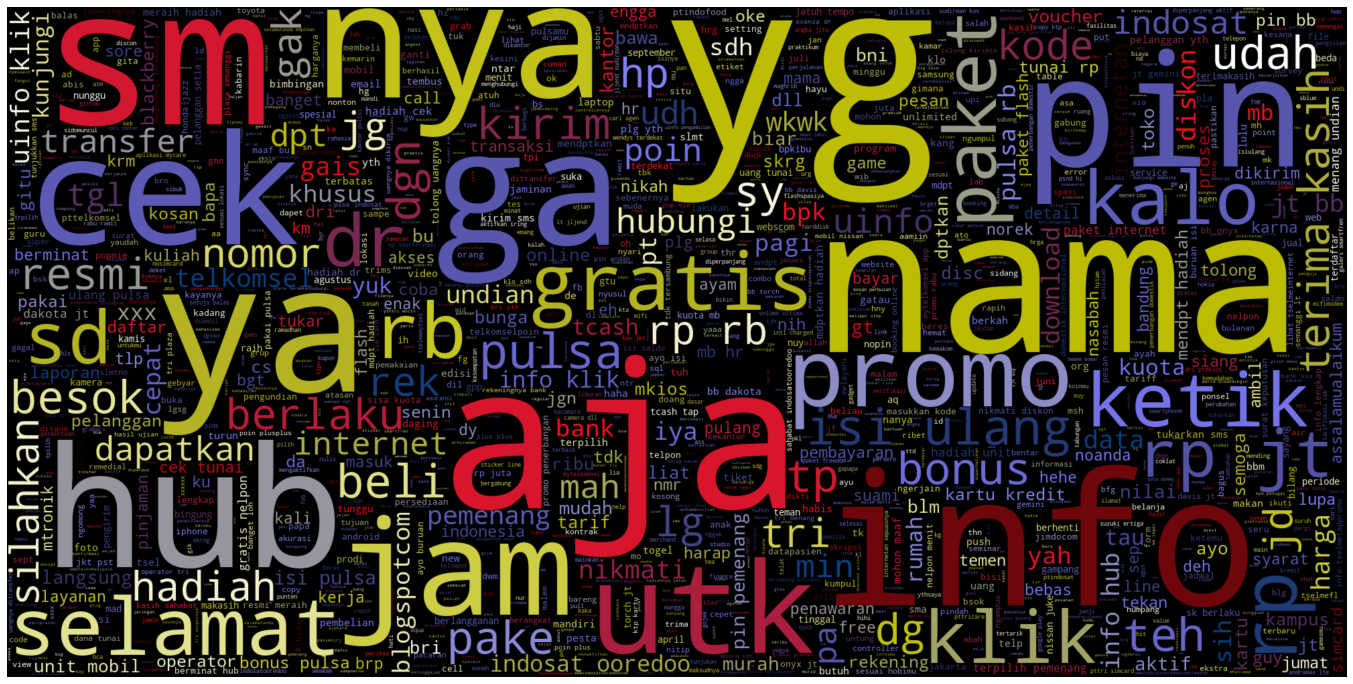

In [49]:
import matplotlib.pyplot as plt

texts = get_tokens(0)
texts = ' '.join(texts)
# generating wordcloud
wordcloud = WordCloud(max_words=1500,
                      max_font_size=350, random_state=42,
                      width=2000, height=1000,
                      colormap = "gist_stern")
wordcloud.generate(texts)

# plotting
plt.figure(figsize = (24, 13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

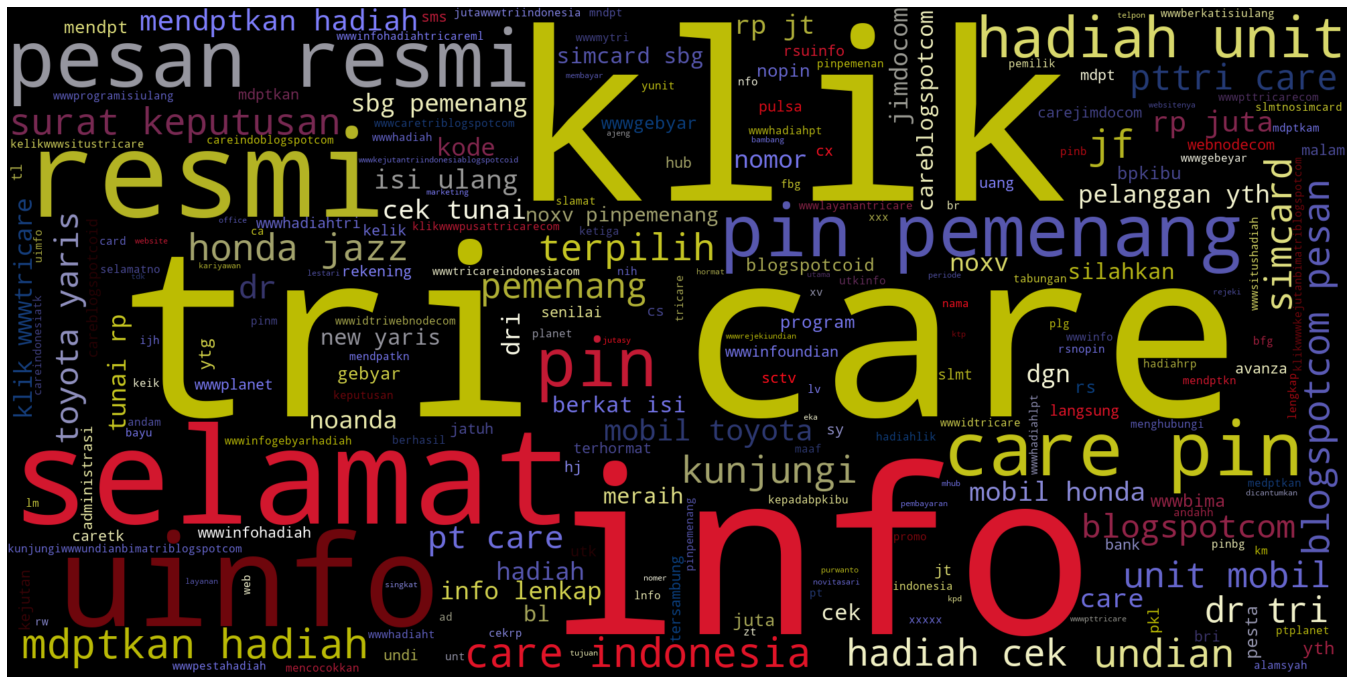

In [50]:
texts = get_tokens(1)
texts = ' '.join(texts)
# generating wordcloud
wordcloud = WordCloud(max_words=1500,
                      max_font_size=350, random_state=42,
                      width=2000, height=1000,
                      colormap = "gist_stern")
wordcloud.generate(texts)

# plotting
plt.figure(figsize = (24, 13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

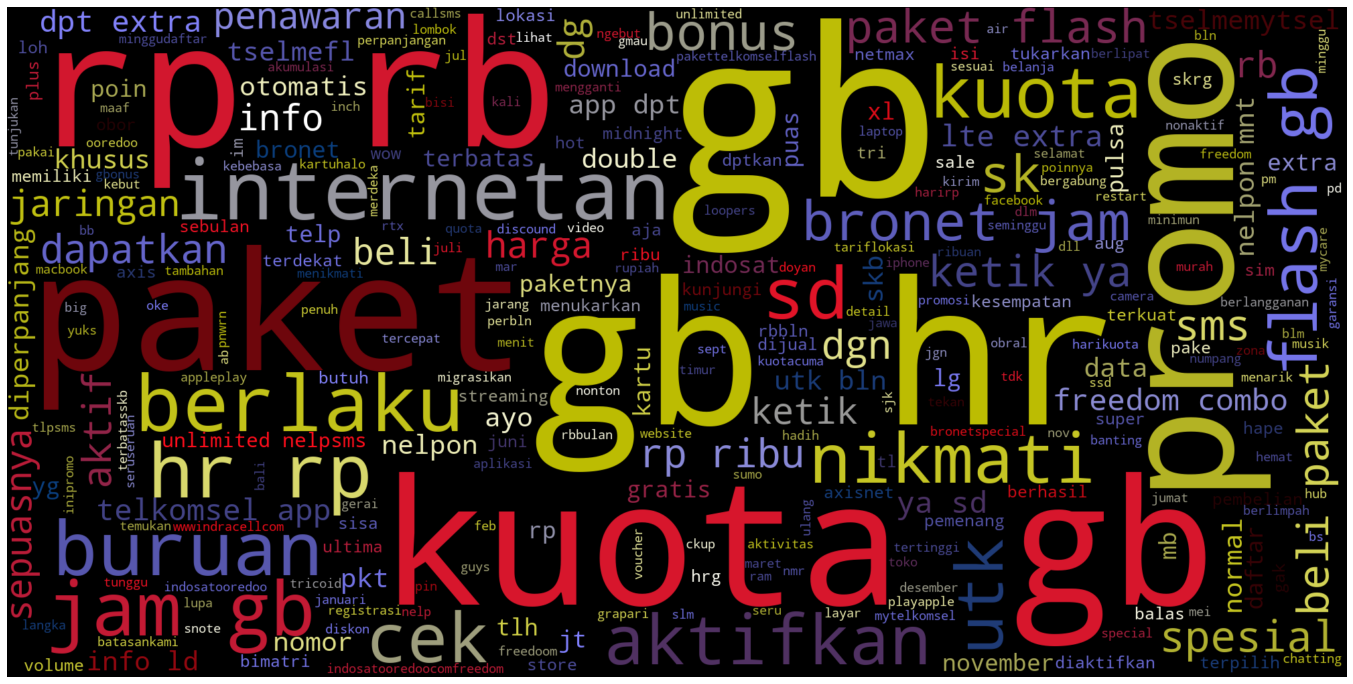

In [51]:
texts = get_tokens(2)
texts = ' '.join(texts)
# generating wordcloud
wordcloud = WordCloud(max_words=1500,
                      max_font_size=350, random_state=42,
                      width=2000, height=1000,
                      colormap = "gist_stern")
wordcloud.generate(texts)

# plotting
plt.figure(figsize = (24, 13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

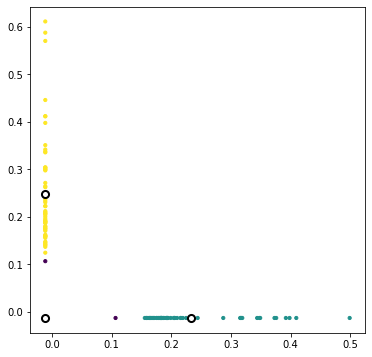

In [64]:
plt.figure(figsize=(6,6))
plt.scatter(X_transform[:,0], X_transform[:,1], c=clus, s=10)
plt.scatter(center[:,0], center[:,1], c="w", edgecolor="k", s=50, linewidths=2)